In [2]:
!pip install fastbook
import fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/Mushrooms'

Mounted at /content/drive


In [6]:
fns = get_image_files(path)
fns

(#13428) [Path('/content/drive/My Drive/Mushrooms/Hygrocybe/072_G-fOGmTh3jY.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/010_VVjiGvYb6yM.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/029_SZIbojUxXyM.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/092_pLnT-Cgm2OA.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/054_h1dqNB3niA0.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/043_RM18aprRsvU.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/099_BDIBlqciLNc.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/079_xVMQ3LbF-DA.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/110_QzQqyA3INWI.jpg'),Path('/content/drive/My Drive/Mushrooms/Hygrocybe/027_58yTWJ00RKo.jpg')...]

In [7]:
#failed = verify_images(fns)
#failed

In [8]:
#failed.map(Path.unlink);

**EDA**

In [53]:
labels = ['Suillus', 'Russula','Agaricus', 'Boletus', 'Amanita', 'Lactarius', 'Hygrocybe', 'Entoloma', 'Cortinarius' ]
IMG_SIZE = 124

In [51]:
import cv2
from tqdm import tqdm

def loadData(DIR):
    X = []
    Y = []
    for label in labels:
        path = os.path.join(DIR, label)
        class_num = labels.index(label)
        for img in tqdm(os.listdir(path)):
            try:
                arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))
                X.append(resized_arr)
                Y.append(class_num)
            except Exception as e:
                print(e)
    return (np.array(X), np.array(Y))

In [54]:
(X, Y) = loadData(path)

100%|██████████| 9/9 [00:00<00:00, 66.18it/s]


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion faile

100%|██████████| 836/836 [00:13<00:00, 60.05it/s]


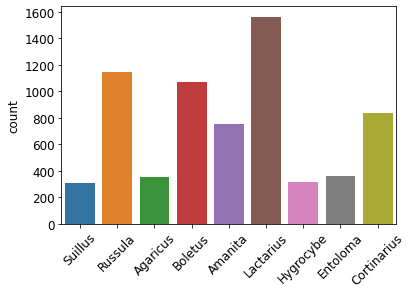

In [61]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

l = []
for img in Y:
    l.append(labels[img])

plt.xticks(rotation=45)
sns.countplot(l)
plt.show()


Using RandomSplitter to split the data into training and validation datasets

In [9]:
mushrooms = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label
)

Resizing all the images with the RandomResizedCrop() to 224 and aug_transforms() for data augmentation.

In [10]:
mushrooms = mushrooms.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

Now the DataBlock is ready, we can create DataLoader

In [11]:
dls = mushrooms.dataloaders(path)

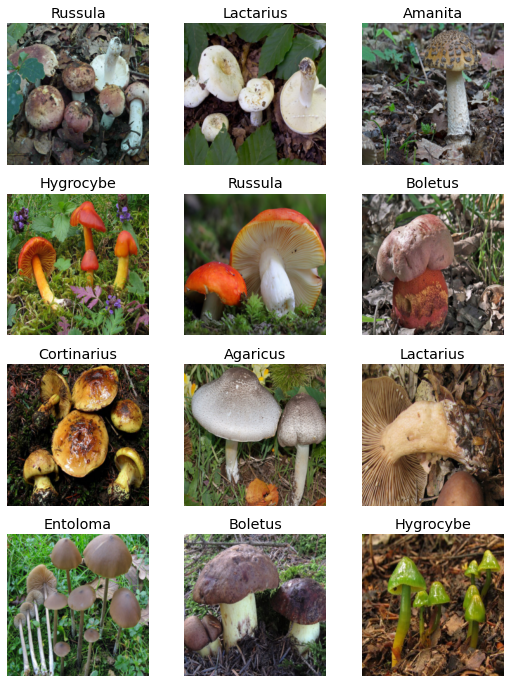

In [12]:
dls.valid.show_batch(max_n=12, nrows=4) 

**Creating the model**

Finding best learning rate (LR)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.508035,0.904817,0.297579,43:56


epoch,train_loss,valid_loss,error_rate,time
0,0.822997,0.460997,0.159032,1:02:47
1,0.476100,0.330162,0.110615,1:02:36
2,0.310896,0.258711,0.085289,1:03:05


SuggestedLRs(valley=7.585775892948732e-05)

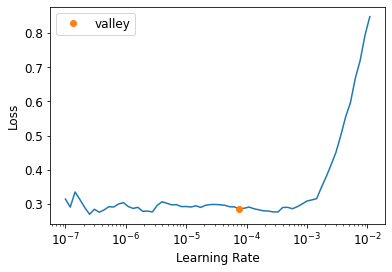

In [15]:
learn.lr_find()

confusion matrix

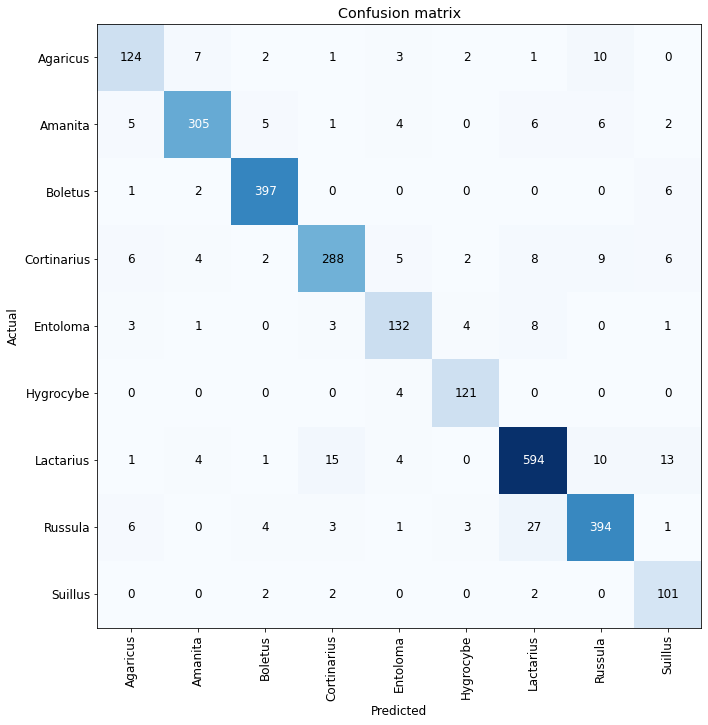

In [17]:
from IPython.core.pylabtools import figsize 
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(10,10))

**Checking the results**

plot_top_losses is a functionality, which allows users to inspect models' results by plotting images sorted by various combinations of losses.

This API makes it easy to immediately spot pictures the model struggles the most with, giving the practitioner the opportunity to take swift action to correct this behaviour (remove wrong samples, correct mis-labellings, etc)

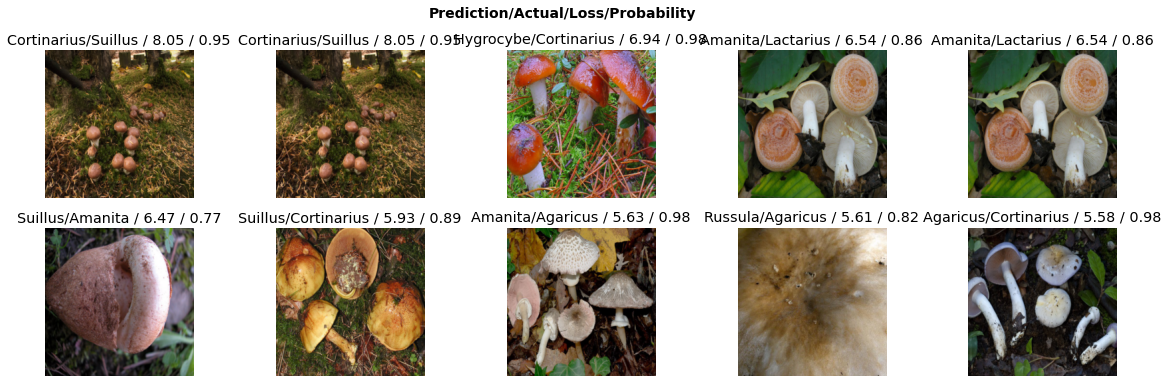

In [18]:
interp.plot_top_losses(10, nrows=2, figsize=(20,6))

**Saving the model**

In [19]:
learn.export(fname='resnet18.pkl')